# Detecting a Pulsar Star

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

### Pulsar astrophysics

(Source: https://archive.ics.uci.edu/ml/datasets/HTRU2)

Pulsars are a rare type of neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter.

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars
rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

A pulsar signal has 2 quantities characterizing it:  
1. Pulsar's integrated pulse profile (IPP) - This is essentially its fingerprint. 
2. Dispersion measure signal-to-noise ratio curve (DM-SNR curve) - Dispersion measure is loosely defined as the integrated column density of free electrons between observer and the pulsar. Dispersion decreases the energy in the pulse causing the signal-to-noise ratio to decrease.

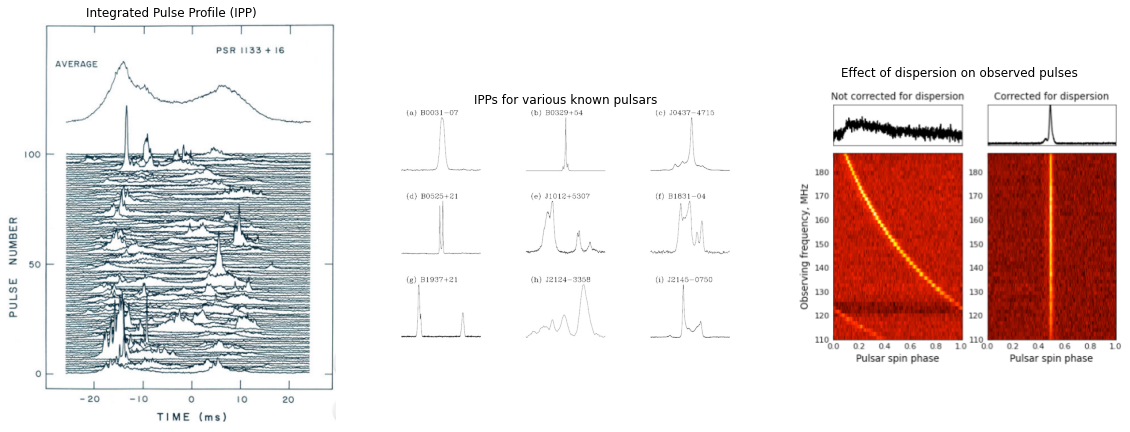

In [2]:
import matplotlib.image as mpimg

fig, axs = plt.subplots(1, 3, figsize=(20,10))
img = mpimg.imread(os.getcwd()+"/data/pulsar_IP.png")
axs[0].imshow(img)
axs[0].axis('off')
axs[0].set_title("Integrated Pulse Profile (IPP)")

img = mpimg.imread(os.getcwd()+"/data/pulsar_IPs2.jpg")
axs[1].imshow(img, cmap='Greys_r')
axs[1].axis('off')
axs[1].set_title("IPPs for various known pulsars")

img = mpimg.imread(os.getcwd()+"/data/dm-snr3.png")
axs[2].imshow(img)
axs[2].axis('off')
axs[2].set_title("Effect of dispersion on observed pulses")

plt.show()

## Exploratory Data Analysis

In this dataset we have 8 statistical quantities, 4 each for the IPP and DM-SNR, as our features. 

In [3]:
dataset = pd.read_csv(os.getcwd()+"/data/HTRU_2.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Mean of the integrated pulse profile                17898 non-null  float64
 1   Standard deviation of the integrated pulse profile  17898 non-null  float64
 2   Excess kurtosis of the integrated pulse profile     17898 non-null  float64
 3   Skewness of the integrated pulse profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                            17898 non-null  float64
 5   Standard deviation of the DM-SNR curve              17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve                 17898 non-null  float64
 7   Skewness of the DM-SNR curve                        17898 non-null  float64
 8   target_class                                        17898 non-null  object 
d

In [4]:
dataset.head(10)

,Mean of the integrated pulse profile,Standard deviation of the integrated pulse profile,Excess kurtosis of the integrated pulse profile,Skewness of the integrated pulse profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,not_pulsar
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,not_pulsar
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,not_pulsar
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,not_pulsar
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,not_pulsar
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,not_pulsar
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,not_pulsar
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,not_pulsar
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,not_pulsar
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,not_pulsar


In [5]:
import collections
print(collections.Counter(dataset['target_class']))

Counter({'not_pulsar': 16259, 'pulsar': 1639})


Looks like ~10% of the total samples belong to the positive class.

Let's scale the features and compute pair-wise correlation

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = list(dataset.columns)
cols.remove("target_class")

for feature in cols:
    dataset[feature] = scaler.fit_transform(dataset[[feature]]) 

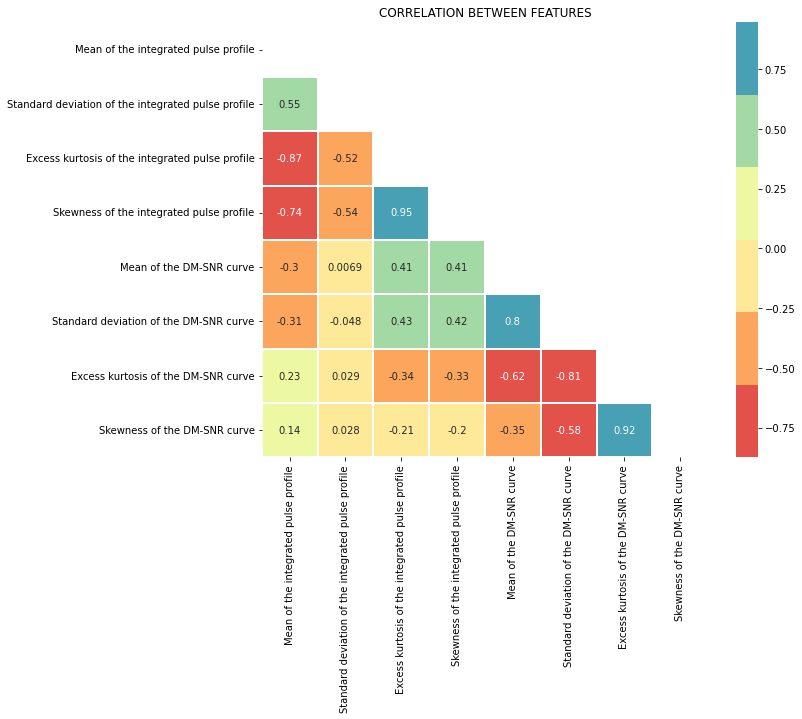

In [8]:
correlation = dataset[['Mean of the integrated pulse profile',
                       'Standard deviation of the integrated pulse profile',
                       'Excess kurtosis of the integrated pulse profile',
                       'Skewness of the integrated pulse profile', 
                       'Mean of the DM-SNR curve',
                       'Standard deviation of the DM-SNR curve',
                       'Excess kurtosis of the DM-SNR curve', 
                       'Skewness of the DM-SNR curve']].corr()
mask = np.triu(np.ones_like(correlation))
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,mask=mask,
            cmap=sns.color_palette("Spectral"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN FEATURES")
plt.show()

Observations: Skewness and Excess Kurtosis of the IPP are highly positively correlated. 

Now, let's look at the distributiuon of values of each feature.

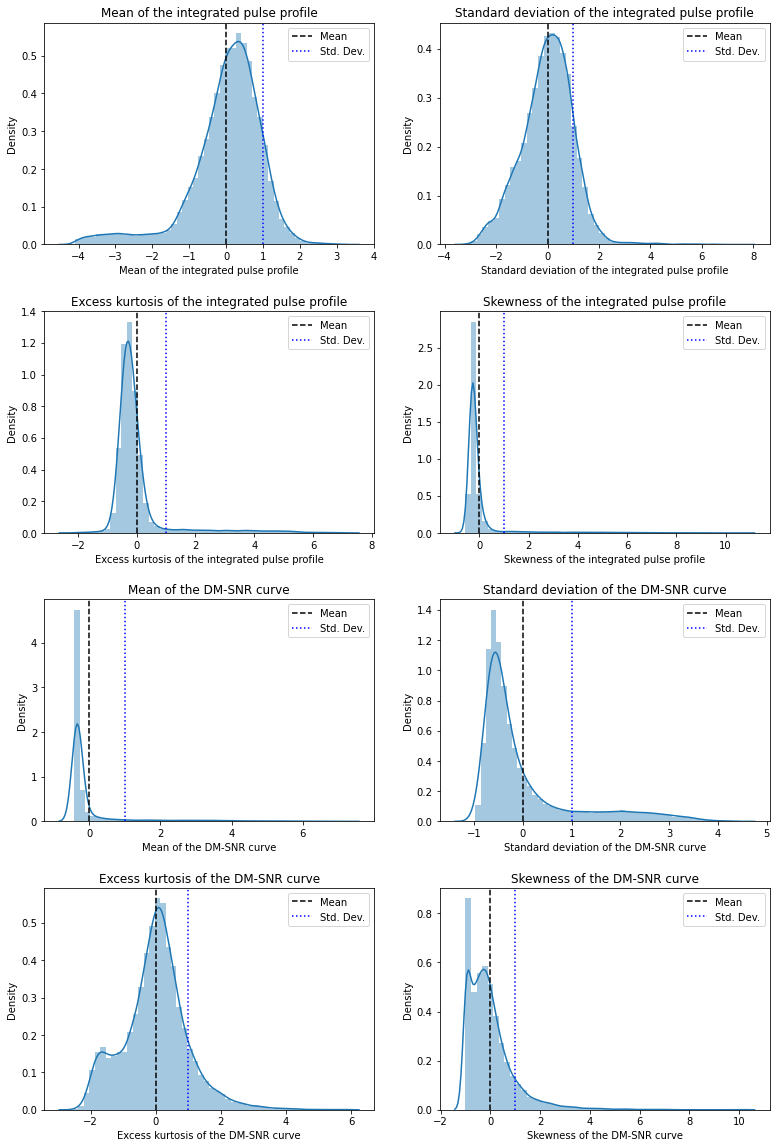

In [9]:
import itertools
columns = cols.copy()
length  = len(columns)

plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(dataset[i])
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(dataset[i].mean(),color = "k",linestyle="dashed",label="Mean")
    plt.axvline(dataset[i].std(),color = "b",linestyle="dotted",label="Std. Dev.")
    plt.legend(loc="upper right")

Observations: 

1. Skewness and excess kurtosis of the DM-SNR curve look bimodal. 
2. Mean and excess kurtosis of IPP and standard deviation of the DM-SNR curve have a long heavy tail. 

Now, let's look at the class-wise distribution of values of each feature.

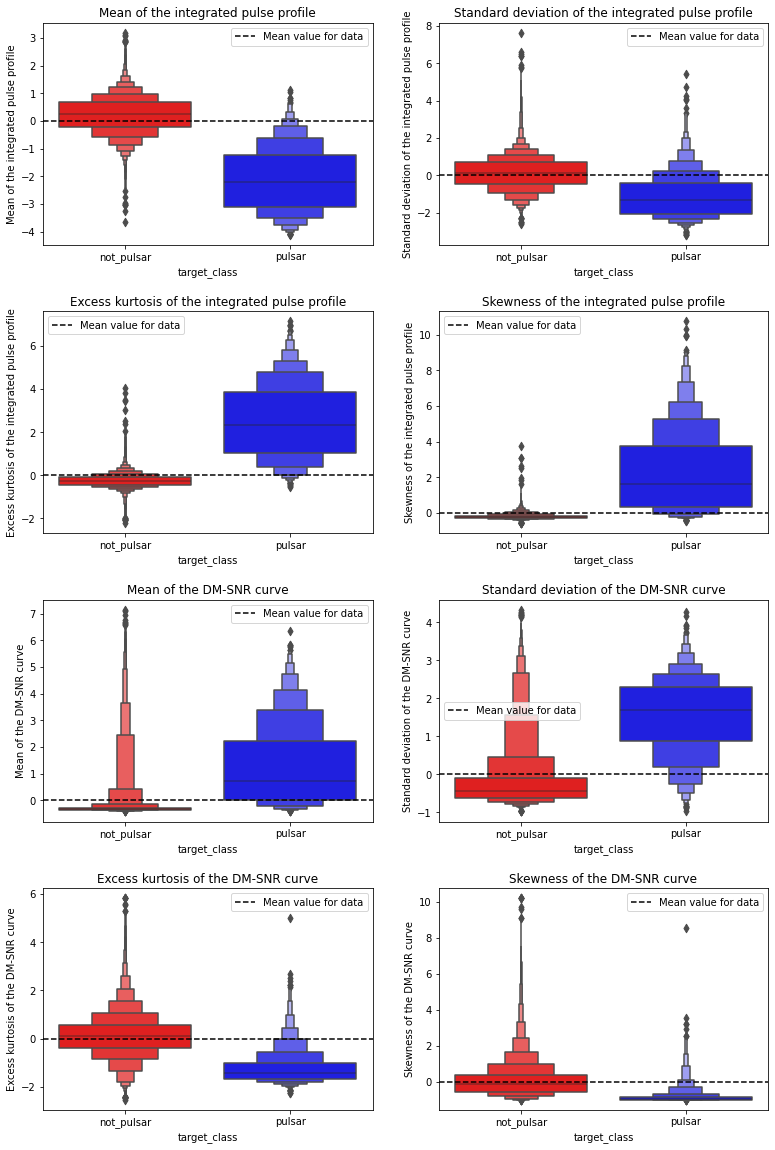

In [10]:
columns = [x for x in dataset.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.boxenplot(x=dataset["target_class"],y=dataset[i],palette=["red","blue"])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(dataset[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="best")

And, let's also obtain a pairplot of features.

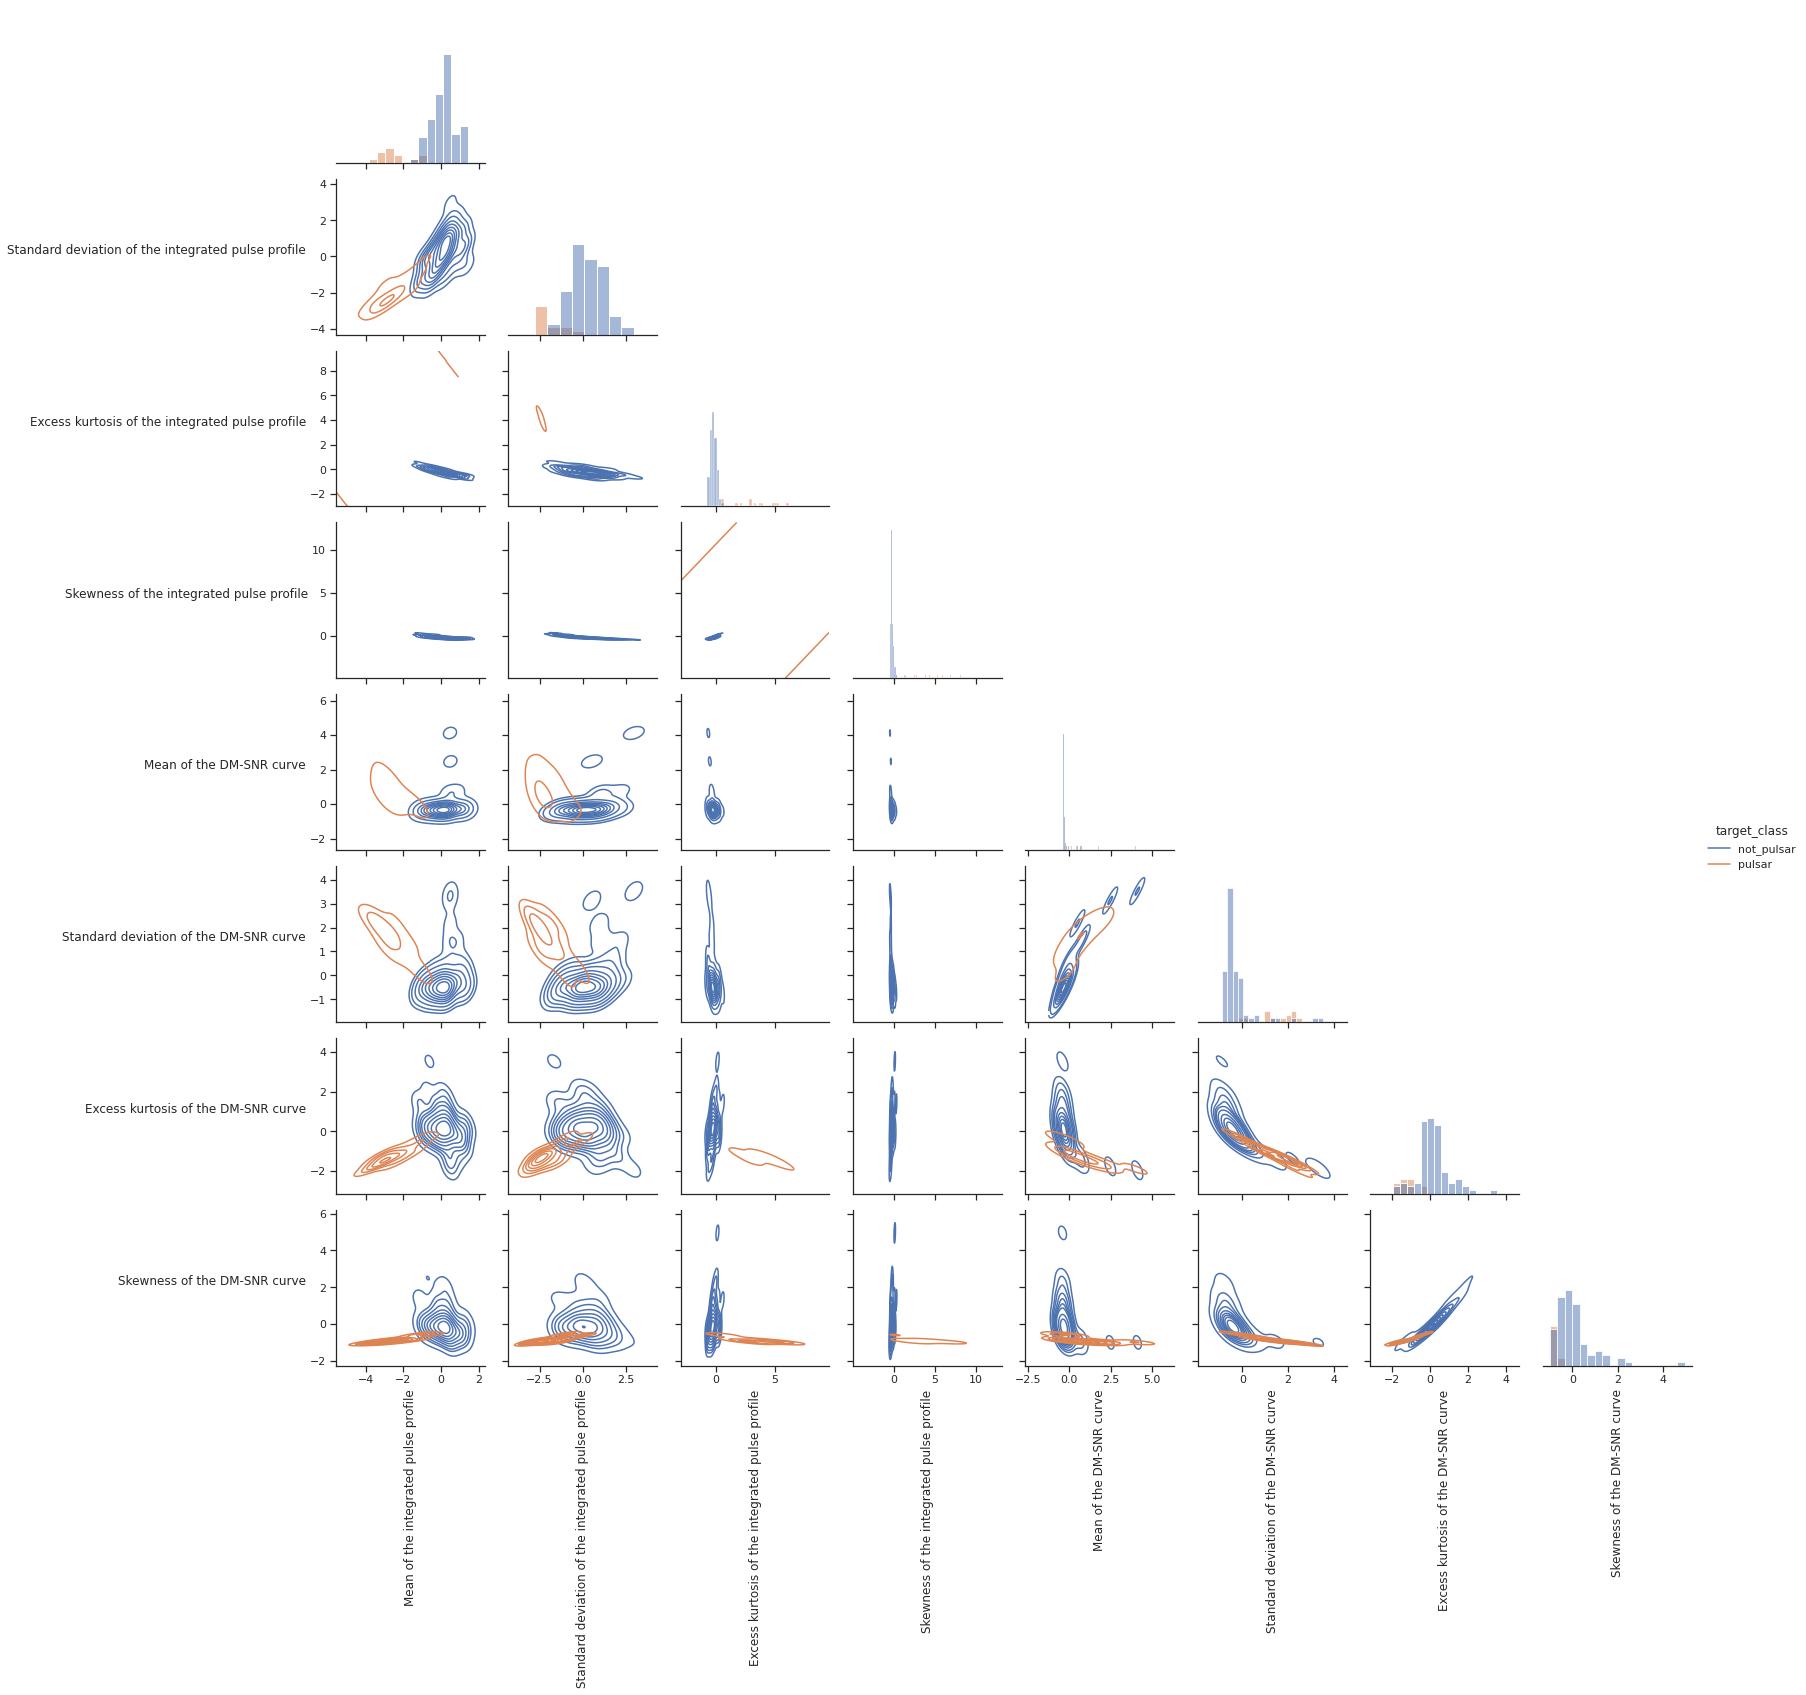

In [12]:
sns.set(style="ticks")
#sns.set_palette(sns.color_palette("husl", 8))
g = sns.PairGrid(data=dataset.sample(n=100), hue="target_class", corner=True)
g = g.map_diag(sns.histplot)
# g = g.map_offdiag(sns.scatterplot, size=1, edgecolor='none')
g = g.map_offdiag(sns.kdeplot)
g = g.add_legend()
for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 90)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')

# Conclusions

The mean and excess kurtosis of the integrated profile values seem more separable w.r.t to the target and therefore may be the top discriminatory features between the two classes. We will test and report if this claim is true by examining feature importances of our trained models. 

Since these are simple features, the team will implement from scratch <insert list of models e.g. Decision Tree, Bayes Classifier, Logistic Regression, Simple Multi-Layer Perceptron, etc.> to classify the pulsar candidates in the dataset as real pulsars vs. false candidates.

We will use the following evaluation metrics: [insert list of various binbary classification evaluation metrics you will use here]. We will also report feature importance scores for each feature to determine which features are more predictive of the target. 

(Note from course TA: Some models infer feature importances by default. But for other models you can use Shapley values - https://shap.readthedocs.io/en/latest)